In [6]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('AmesHousing.csv', sep='\t')
print(data.shape)
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
null_values = data['Lot Frontage'].isnull().sum()
print(f"'Lot Frontage': {null_values}")


'Lot Frontage': 490


In [9]:
missing_frontage_by_area = (
    data['Lot Frontage']
    .isna()
    .groupby(data['Neighborhood'])
    .sum()
    .sort_values(ascending=False)
)

print(missing_frontage_by_area)

Neighborhood
NAmes      68
Gilbert    54
Sawyer     53
CollgCr    47
NWAmes     46
Mitchel    24
ClearCr    24
Crawfor    20
Somerst    20
SawyerW    19
NoRidge    17
Edwards    16
Timber     15
BrkSide    13
OldTown    10
Blmngtn     8
Veenker     8
IDOTRR      6
StoneBr     5
MeadowV     4
SWISU       4
NridgHt     3
NPkVill     2
GrnHill     2
Landmrk     1
Greens      1
Blueste     0
BrDale      0
Name: Lot Frontage, dtype: int64


In [10]:
data = data.reset_index(drop=True)
data['Lot Frontage'] = (
    data.groupby('Neighborhood')['Lot Frontage']
        .transform(lambda x: x.fillna(x.median()))
)


/Users/carlachira/ML/primaTema/lab1/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/carlachira/ML/primaTema/lab1/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)
print("Number of missing values in 'Lot Frontage':", data['Lot Frontage'].isna().sum())


Number of missing values in 'Lot Frontage': 3


/Users/carlachira/ML/primaTema/lab1/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/carlachira/ML/primaTema/lab1/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [12]:
overall_mean = data['Lot Frontage'].mean()
data['Lot Frontage'].fillna(overall_mean, inplace=True)
print("Number of missing values in 'Lot Frontage' after filling with overall mean:", data['Lot Frontage'].isna().sum())

Number of missing values in 'Lot Frontage' after filling with overall mean: 0


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/1151086636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lot Frontage'].fillna(overall_mean, inplace=True)


In [13]:
data['Alley'] = data['Alley'].fillna('No Alley')
data.groupby('Alley')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Alley,,,,,,,,
Grvl,120.0,123556.908333,35416.445346,35000.0,105000.0,121000.0,143000.0,256000.0
No Alley,2732.0,183420.164348,81135.712696,12789.0,130000.0,163000.0,217000.0,755000.0
Pave,78.0,176945.358974,44424.388360,40000.0,152375.0,172700.0,195750.0,345000.0


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/348995643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alley', y='SalePrice', data=data, palette='Set2')


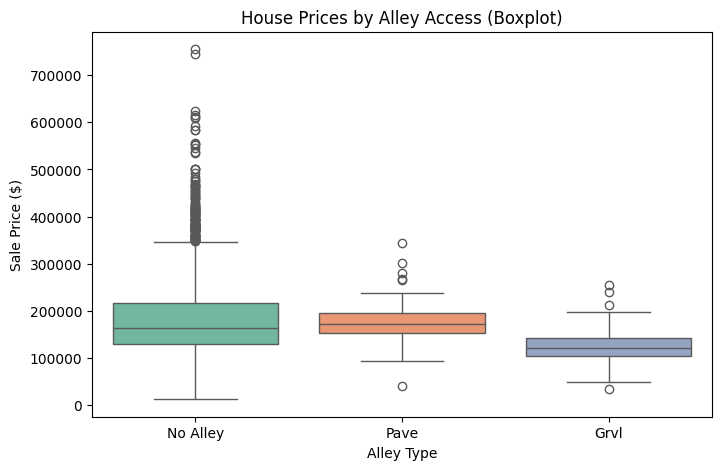

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Alley', y='SalePrice', data=data, palette='Set2')
plt.title('House Prices by Alley Access (Boxplot)')
plt.xlabel('Alley Type')
plt.ylabel('Sale Price ($)')
plt.show()


We drop the Alley column because most houses don’t have alley access, the median sale price is similar across categories, and a few high-priced outliers exist. imbalanced

In [15]:
data = data.drop(columns=['Alley'])

In [16]:
print(data['Mas Vnr Area'].value_counts(dropna=False))
data['Mas Vnr Area'].fillna(0, inplace=True)


Mas Vnr Area
0.0       1748
NaN         23
120.0       15
200.0       13
176.0       13
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: count, Length: 446, dtype: int64


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/3708537939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mas Vnr Area'].fillna(0, inplace=True)


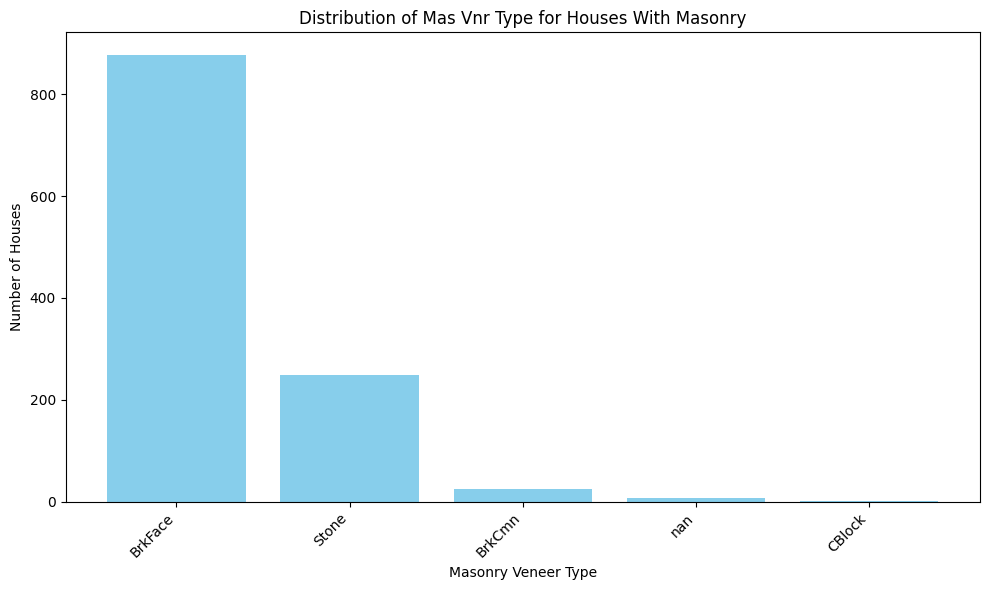

In [17]:
houses_with_masonry = data[data['Mas Vnr Area'] > 0]

m4 = houses_with_masonry['Mas Vnr Type'].value_counts(dropna=False)

plt.figure(figsize=(10,6))
plt.bar(m4.index.astype(str), m4.values, color='skyblue')
plt.xlabel('Masonry Veneer Type')
plt.ylabel('Number of Houses')
plt.title('Distribution of Mas Vnr Type for Houses With Masonry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


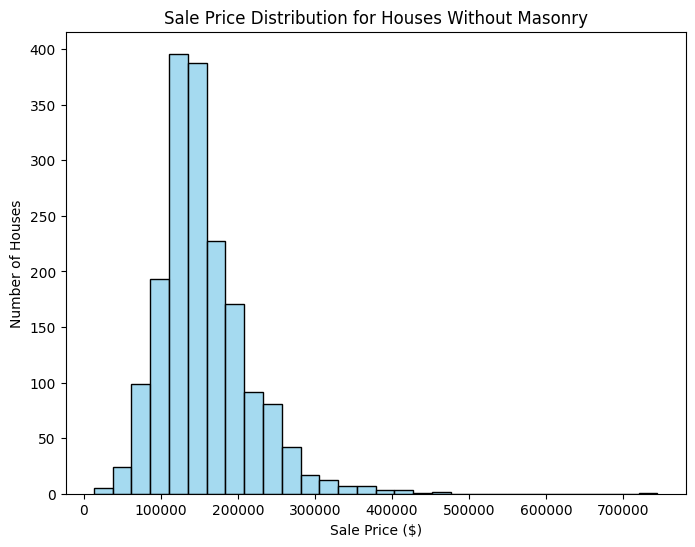

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data[data['Mas Vnr Area'] == 0],
    x='SalePrice',
    bins=30,
    kde=False,
    color='skyblue'
)
plt.title("Sale Price Distribution for Houses Without Masonry")
plt.xlabel("Sale Price ($)")
plt.ylabel("Number of Houses")
plt.show()

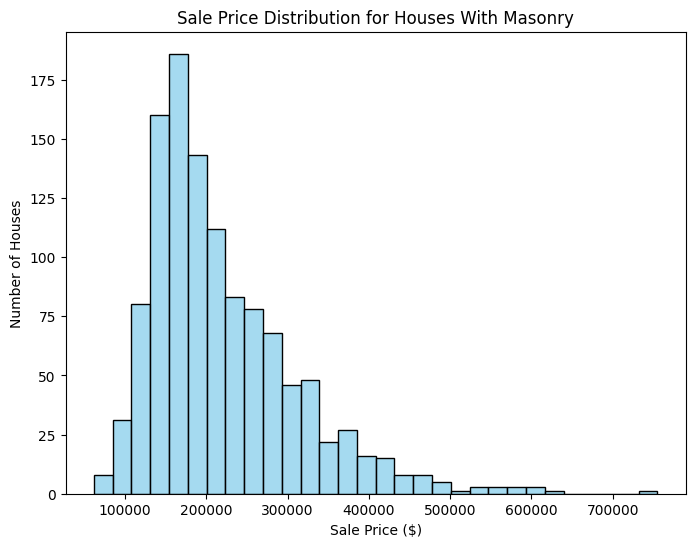

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data[data['Mas Vnr Area'] > 0],
    x='SalePrice',
    bins=30,
    kde=False,
    color='skyblue'
)
plt.title("Sale Price Distribution for Houses With Masonry")
plt.xlabel("Sale Price ($)")
plt.ylabel("Number of Houses")
plt.show()

In [20]:
# not relevant feature
data = data.drop(columns=['Mas Vnr Type', 'Mas Vnr Area'])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


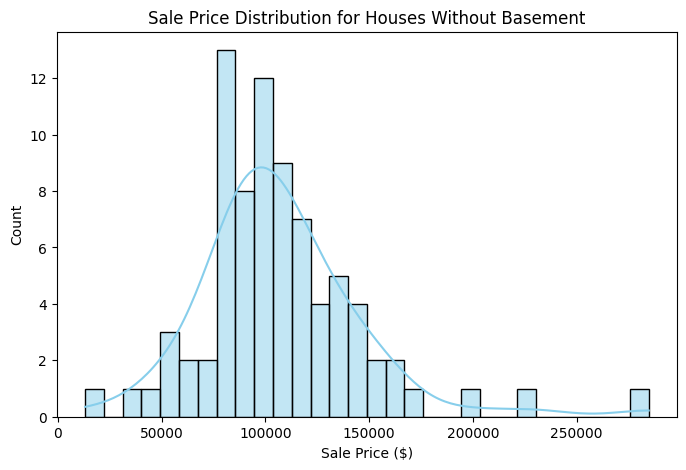

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(
    data[data['Bsmt Cond'].isna()]['SalePrice'], 
    kde=True, 
    bins=30, 
    color='skyblue'
)
plt.title('Sale Price Distribution for Houses Without Basement')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()


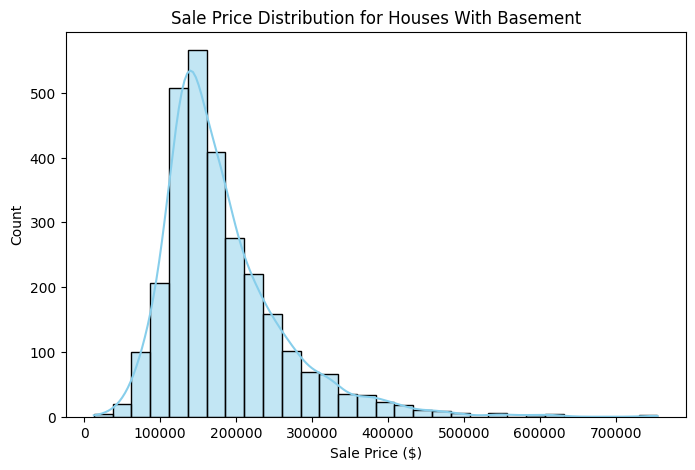

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(
    data[data['Bsmt Cond'].notna()]['SalePrice'], 
    kde=True, 
    bins=30, 
    color='skyblue'
)
plt.title('Sale Price Distribution for Houses With Basement')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()


In [23]:
# Basement categorical features
bsmt_categorical = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2'
]

for col in bsmt_categorical:
    data[col] = data[col].fillna('NoBsmt')

# Basement numerical features
bsmt_numerical = [
    'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath'
]

for col in bsmt_numerical:
    data[col] = data[col].fillna(0)

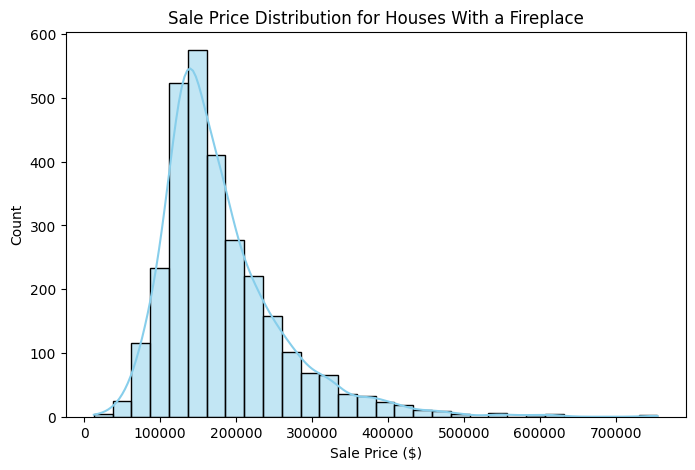

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(
    data[data['Fireplaces'].notna()]['SalePrice'],  # houses with a fireplace
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title('Sale Price Distribution for Houses With a Fireplace')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/586677840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


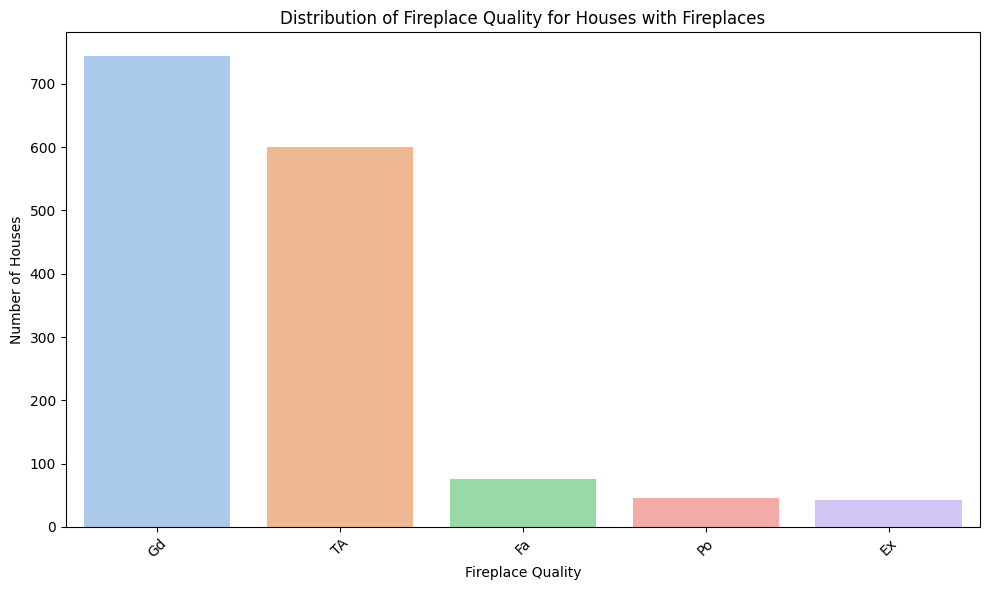

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='Fireplace Qu',
    data=data[data['Fireplaces'].notna()],
    palette='pastel',
    order=data[data['Fireplaces'].notna()]['Fireplace Qu'].value_counts().index
)
plt.xlabel('Fireplace Quality')
plt.ylabel('Number of Houses')
plt.title('Distribution of Fireplace Quality for Houses with Fireplaces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
data = data.drop('Fireplace Qu', axis=1)

In [27]:
data['Fireplaces'] = data['Fireplaces'] > 0

In [28]:
# Fill missing values for categorical garage columns
garage_categoricals = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in garage_categoricals:
    data[col].fillna('NoGarage', inplace=True)

# Fill missing values for numerical garage columns
garage_numericals = ['Garage Yr Blt', 'Garage Cars', 'Garage Area']
for col in garage_numericals:
    data[col].fillna(0, inplace=True)

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/552317323.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('NoGarage', inplace=True)
/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_18540/552317323.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

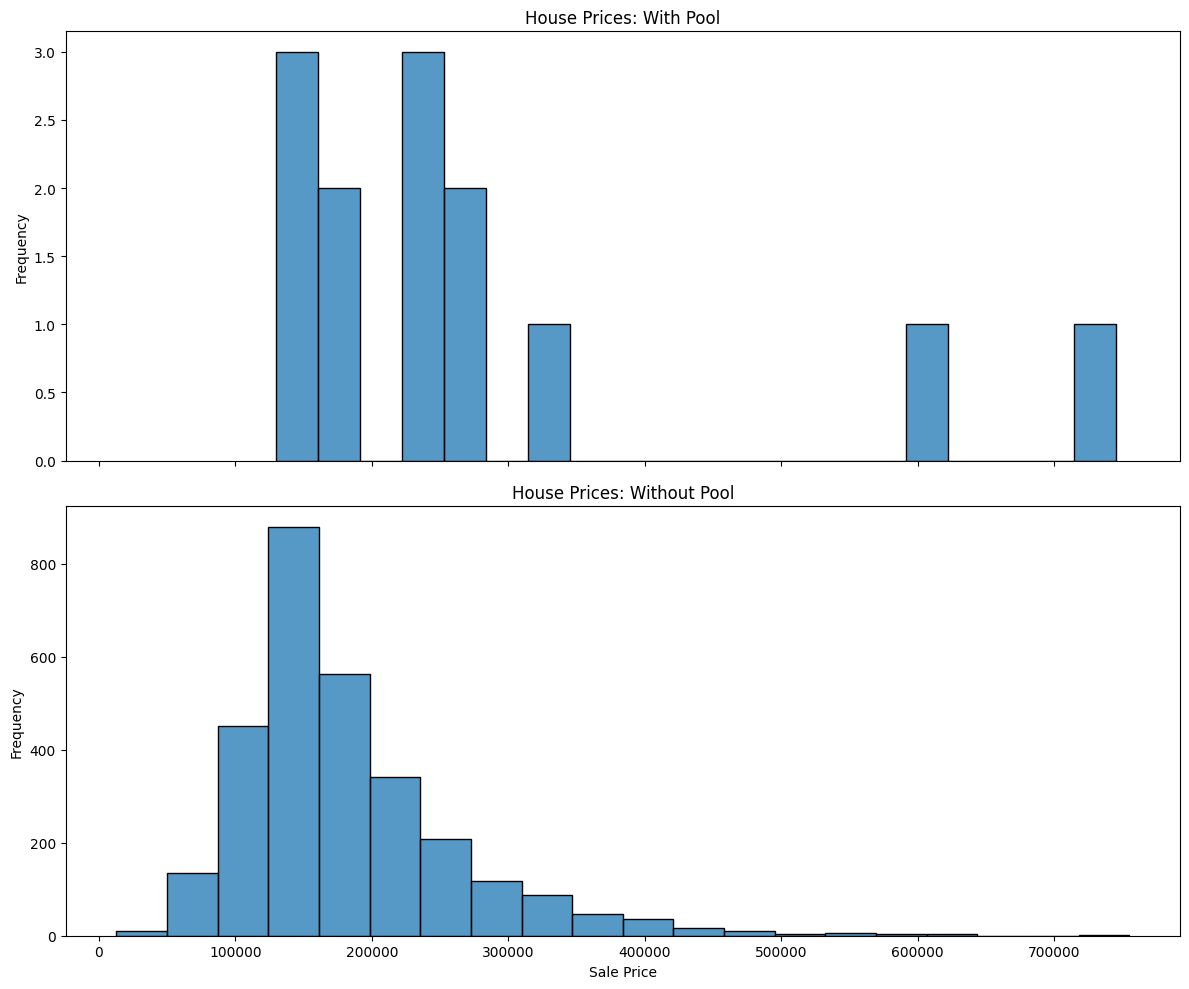

In [29]:
prices_with_pool = data[data['Pool Area'] > 0]['SalePrice']
prices_without_pool = data[data['Pool Area'] == 0]['SalePrice']

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.histplot(prices_with_pool, bins=20, kde=False, ax=axes[0], edgecolor='black')
axes[0].set_title('House Prices: With Pool')
axes[0].set_ylabel('Frequency')

sns.histplot(prices_without_pool, bins=20, kde=False, ax=axes[1], edgecolor='black')
axes[1].set_title('House Prices: Without Pool')
axes[1].set_xlabel('Sale Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
data = data.drop('Pool Area', axis=1)

In [31]:
data = data.drop('Pool QC', axis=1)

In [32]:
# data['HasMisc'].value_counts()
data = data.drop('Misc Feature', axis=1)

In [33]:
missing_count = data['Electrical'].isna().sum()
print(f"Number of unknown/missing Electrical entries: {missing_count}")

Number of unknown/missing Electrical entries: 1


In [34]:
data['Electrical'] = data['Electrical'].fillna('Unknown')


In [35]:
data['Fence'] = data['Fence'].fillna('NoFence')
data['HasFence'] = (data['Fence'] != 'NoFence').astype(int)
data[['HasFence', 'SalePrice']].groupby('HasFence').mean()


,SalePrice
HasFence,
0,187938.447837
1,151352.440559


In [36]:
data.isna().sum().sort_values(ascending=False).head(3)

Order          0
Half Bath      0
Garage Type    0
dtype: int64

In [37]:
total_missing = data.isna().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


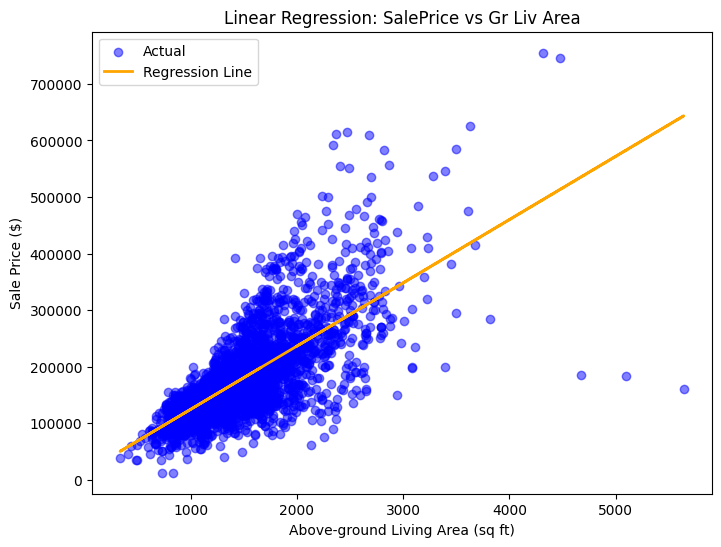

Data point index: 10
Actual SalePrice: 175900
Predicted SalePrice: 198143.21


In [38]:
from sklearn.linear_model import LinearRegression

# Choose features
X = data[['Gr Liv Area']]  # predictor
y = data['SalePrice']      # target

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Scatter + regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual')
plt.plot(X, y_pred, color='orange', linewidth=2, label='Regression Line')
plt.xlabel('Above-ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Linear Regression: SalePrice vs Gr Liv Area')
plt.legend()
plt.show()

# Compare actual vs predicted for one data point
idx = 10
actual = y.iloc[idx]
predicted = y_pred[idx]

print(f"Data point index: {idx}")
print(f"Actual SalePrice: {actual}")
print(f"Predicted SalePrice: {predicted:.2f}")


In [39]:
data.to_csv("cleanedData.csv", index=False)

In [45]:
data.shape

(2930, 76)